#  (#7DaysOfCode - Machine Learning 1/7: Coleta de dados e Análise Exploratória)

* Introdução ao Desafio de Análise Exploratória de Dados do Spotify
Bem-vindo ao primeiro dia do desafio #7DaysOfCode em Machine Learning, onde será mergulhado no fascinante mundo da análise de dados usando um dataset real e relevante—o conjunto de dados de músicas do Spotify. Este desafio é uma oportunidade excepcional para aplicar e aprimorar habilidades de análise de dados, explorar técnicas de visualização e preparar o terreno para futuros projetos de modelagem preditiva.

* Objetivo do Dia

O objetivo deste dia é realizar uma análise exploratória detalhada do banco de dados de músicas do Spotify. Este passo é crucial, pois permite compreender profundamente os dados com os quais se está trabalhando. A análise exploratória de dados (EDA) é a espinha dorsal de qualquer projeto de ciência de dados, fornecendo insights valiosos e direcionando as etapas subsequentes do processo analítico.

* Por Que o Spotify?

O Spotify é uma das plataformas de streaming de música mais populares do mundo, com uma vasta coleção de dados sobre músicas, artistas e hábitos de escuta dos usuários. Analisar esse conjunto de dados não só é relevante devido à sua atualidade e aplicabilidade, mas também porque oferece a chance de explorar relações complexas entre características musicais e popularidade, ajudando a entender o que torna uma música um sucesso.

* O Que Esperar?

Ao longo deste dia, serão guiadas várias etapas de análise, incluindo:

Carregamento e limpeza dos dados para garantir que estão prontos para análise.
Exploração inicial para entender a estrutura e as principais características do dataset.
Análise descritiva para capturar tendências, padrões e anomalias nos dados.
Visualizações usando bibliotecas como Matplotlib e Seaborn para ilustrar as descobertas de maneira intuitiva.
Responder a perguntas específicas que podem revelar insights sobre as preferências dos ouvintes e características das músicas.

In [29]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('https://raw.githubusercontent.com/Quemoel/7DaysOfCode_Machine_Learning/main/17%20Coleta%20de%20dados%20e%20An%C3%A1lise%20Explorat%C3%B3ria/dataset.csv')


In [30]:
# Mostrar as primeiras linhas do dataset para entender a estrutura
print(df.head())


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [31]:
# Resumo dos tipos de dados e presença de valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [32]:
# Contagem de valores nulos por coluna
print(df.isnull().sum())


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [33]:
# Descrição estatística das variáveis numéricas
print(df.describe())

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

 # Análise Descritiva e Identificação de Anomalias
Após verificar a estrutura geral dos dados, vamos analisar algumas estatísticas descritivas para entender melhor as distribuições das variáveis numéricas e identificar possíveis outliers ou anomalias.

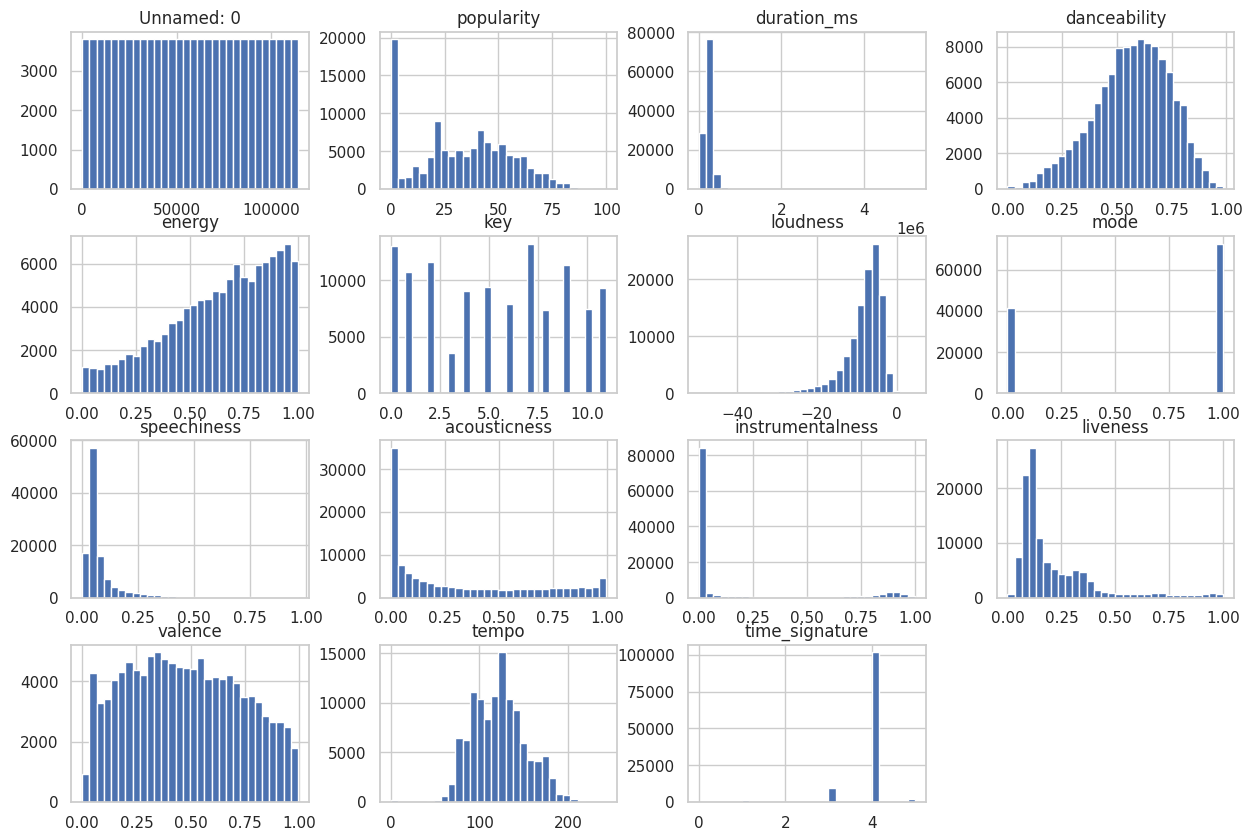

In [34]:
# Histogramas das variáveis numéricas
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Criando histogramas para todas as variáveis numéricas
df.hist(bins=30, figsize=(15, 10))
plt.show()


# Análise Específica de Perguntas
Podemos começar a responder perguntas específicas que você mencionou, como identificar as 100 músicas mais populares ou os artistas mais ouvidos. Aqui está como você pode fazer isso:

In [35]:
# Top 100 músicas mais populares
top100_songs = df.sort_values(by='popularity', ascending=False).head(100)
print(top100_songs)



       Unnamed: 0                track_id                    artists  \
20001       20001  3nqQXoyQOWXiESFLlDF1hG       Sam Smith;Kim Petras   
81051       81051  3nqQXoyQOWXiESFLlDF1hG       Sam Smith;Kim Petras   
51664       51664  2tTmW7RDtMQtBk7m2rYeSw           Bizarrap;Quevedo   
81210       81210  4uUG5RXrOk84mYEfFvj3cK    David Guetta;Bebe Rexha   
89411       89411  5ww2BF9slyYgNOk37BlC4u              Manuel Turizo   
...           ...                     ...                        ...   
68553       68553  4tYFy8ALRjIZvnvSLw5lxN   Bad Bunny;Rauw Alejandro   
68673       68673  1797zYiX4cKosMH836X9Gt        Bad Bunny;Tony Dize   
79001       79001  75FEaRjZTKLhTrFGsfMUXR                  Kate Bush   
20014       20014  7ef4DlsgrMEH11cDZd32M6     Calvin Harris;Dua Lipa   
79051       79051  72yP0DUlWPyH8P7IoxskwN  Elton John;Britney Spears   

                                  album_name  \
20001              Unholy (feat. Kim Petras)   
81051              Unholy (feat. Kim Pe

In [36]:
# Contagem de músicas por artista
artist_counts = df['artists'].value_counts()
print(artist_counts.head(10))  # Exibir os 10 artistas com mais músicas no dataset


artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64


In [37]:
# Contagem de músicas por gênero musical
genre_counts = df['track_genre'].value_counts()
print(genre_counts.head(10))  # Exibir os 10 gêneros com mais músicas no dataset


track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
Name: count, dtype: int64


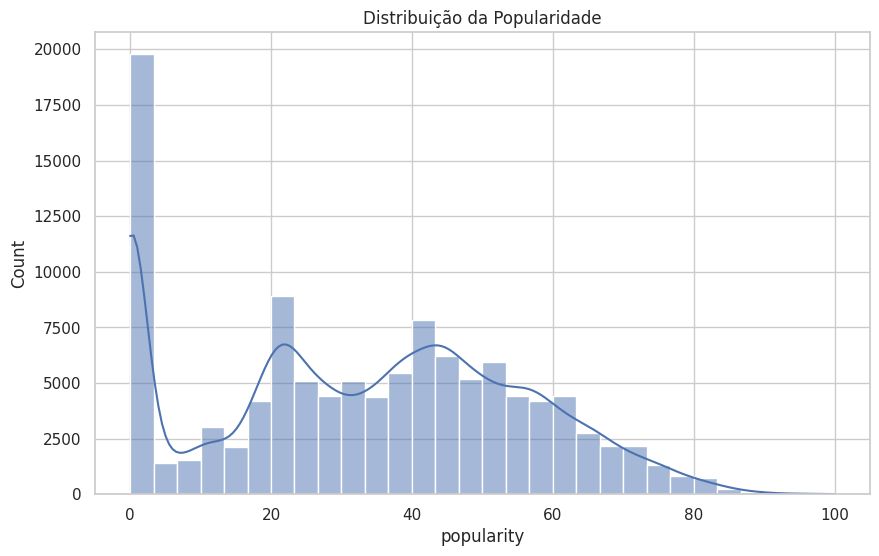

In [38]:

# Histograma de popularidade
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribuição da Popularidade')
plt.show()

In [39]:
# Identificar e contar duplicatas baseadas em 'track_id'
duplicate_tracks = df.duplicated(subset='track_id', keep=False)
print(f"Número de duplicatas: {duplicate_tracks.sum()}")

# Opcional: Remover duplicatas
df_unique = df.drop_duplicates(subset='track_id', keep='first')


Número de duplicatas: 40900


In [40]:
# Média de popularidade por gênero
genre_popularity = df_unique.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
print(genre_popularity.head(10))

track_genre
k-pop       59.358779
pop-film    59.096933
metal       56.422414
chill       53.738683
latino      51.788945
sad         51.109929
grunge      50.587007
indian      49.765348
anime       48.776884
emo         48.500000
Name: popularity, dtype: float64
